# Figure 1
## Libraries

In [1]:
library(ggplot2)
library(reshape2)
library(cowplot)
library(ggridges)
library(dplyr)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘ggridges’

The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Input

In [2]:
#Ct data
ct_vals <- read.table("data/Ct_counts.tsv", sep="\t", header=TRUE)
ct_vals$ID <- paste(ct_vals$Type, ct_vals$SampleID, sep="_")
universal_ct <- ct_vals[ct_vals$Organism == 'Universal',]
rownames(universal_ct) <- paste(universal_ct$Type, universal_ct$Site, universal_ct$SampleID, sep="_")
species_ct <- ct_vals[ct_vals$Organism != 'Universal',]
#Filter out organisms that don't have measurements across all conditions
species_ct <- species_ct[species_ct$Organism %in% c('Aa','Ff','Pe','Pg','Pi','So','Td','Tf','Cm','Smi','Smu', 'So', 'Ss'),]
#Normalize species-specific counts by the appropriate Universal Ct values
for (i in 1:nrow(species_ct)) {
    species_ct[i,"Ct"] <- species_ct[i,"Ct"] / universal_ct[paste(species_ct[i,"Type"], species_ct[i,"Site"], species_ct[i,"SampleID"], sep="_"), "Ct"]
}

In [3]:
#Sequence abundance data
seq_vals <- read.table("data/taxa_abundance_species.csv", sep=",", header=TRUE, row.names=1)
#transformed_counts <- t(varianceStabilizingTransformation(t(as.matrix(seq_vals[,1:(ncol(seq_vals)-3)])), fitType='local'))
transformed_counts <- t(scale(t(seq_vals[,1:(ncol(seq_vals)-3)]), center=FALSE, scale=rowSums(seq_vals[,1:(ncol(seq_vals)-3)])))
target <- transformed_counts[,grep('Actinomyces',colnames(transformed_counts))]
target <- rowSums(target)
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'A*'
seq_tab <- target_vals
target <- transformed_counts[,grep('.D_5__Fretibacterium.D_6__uncultured.Synergistetes.bacterium',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'F*'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('endodon',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'Pe'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('D_5__Porphyromonas.__',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'P*'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('Prevotella.intermedia',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'Pi'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('Streptococcus.__',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'S*'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('Treponema.denticola',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'Td'
seq_tab <- rbind(seq_tab, target_vals)
target <- transformed_counts[,grep('Tannerella.forsythia',colnames(seq_vals))]
target_vals <- data.frame(Abundance=target, Type=as.vector(seq_vals$Type), Site=as.vector(seq_vals$Site))
target_vals$Organism <- 'Tf'
seq_tab <- rbind(seq_tab, target_vals)
seq_tab$Organism <- factor(seq_tab$Organism, levels=c("Aa", "F*", "Pe", "P*","Pi","S*","Td", "Tf"))

# Plots

## Vestigial Figure Generation, may be useful later

### qPCR Data

In [4]:
all_qpcr <- ggplot(species_ct, aes(x=Type, y=1/Ct, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7, outlier.shape = NA) +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [5]:
subg_qpcr <- ggplot(subset(species_ct, Site=='Subgingival'), aes(x=Type, y=1/Ct, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7,outlier.shape = NA) +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [6]:
supg_qpcr <- ggplot(subset(species_ct, Site=='Supragingival'), aes(x=Type, y=1/Ct, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), scale='free_y', ncol=4) + geom_boxplot(alpha=0.7,outlier.shape = NA) +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [7]:
tongue_qpcr <- ggplot(subset(species_ct, Site=='Tongue'), aes(x=Type, y=1/Ct, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), scale='free_y', ncol=4) + geom_boxplot(alpha=0.7, outlier.shape = NA) +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

### Sequence Data

In [8]:
options(repr.plot.width=6*1.5, repr.plot.height=3*1.5)
all_seq <- ggplot(subset(seq_tab, Type != "Moderate"), aes(x=Type, y=Abundance, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7, outlier.shape = NA) + ylab("Transformed Abundance") +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [9]:
subg_seq <- ggplot(subset(subset(seq_tab, Site == 'SubG'), Type != 'Moderate'), aes(x=Type, y=Abundance, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7, outlier.shape = NA) + ylab("Transformed Abundance") +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [10]:
supg_seq <- ggplot(subset(subset(seq_tab, Site == 'SupG'), Type != 'Moderate'), aes(x=Type, y=Abundance, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7, outlier.shape = NA) + ylab("Transformed Abundance") +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

In [11]:
tongue_seq <- ggplot(subset(subset(seq_tab, Site == 'Tongue'), Type != 'Moderate'), aes(x=Type, y=Abundance, colour=Type)) + geom_point(position="jitter") +
    scale_colour_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255), 
                         rgb(231,41,138,maxColorValue = 255))) + 
    facet_wrap(vars(Organism), ncol=4, scale='free_y') + geom_boxplot(alpha=0.7, outlier.shape = NA) + ylab("Transformed Abundance") +
    theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")

## Figure 4 Generation

In [12]:
fig_qpcr <- species_ct %>% 
  ggplot(aes(x=1/Ct, y=Type, fill=Type)) +
  scale_fill_grey(start=0.8, end=0.2) + stat_density_ridges(quantile_lines = TRUE, alpha=0.7) +
  facet_wrap(Organism ~ Site, scales='free_x', ncol=6) +
  theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none") + xlab("1/Ct") + ylab("")

## Figure 4

Picking joint bandwidth of 0.0262
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.0267
Picking joint bandwidth of 0.0293
Picking joint bandwidth of 0.0252
Picking joint bandwidth of 0.0202
Picking joint bandwidth of 0.034
Picking joint bandwidth of 0.0369
Picking joint bandwidth of 0.0337
Picking joint bandwidth of 0.0423
Picking joint bandwidth of 0.0333
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0111
Picking joint bandwidth of 0.0311
Picking joint bandwidth of 0.0402
Picking joint bandwidth of 0.0381
Picking joint bandwidth of 0.0281
Picking joint bandwidth of 0.019
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.018
Picking joint bandwidth of 0.0443
Picking joint bandwidth of 0.0385
Picking joint bandwidth of 0.0249
Picking joint bandwidth of 0.0323
Picking joint bandwidth of 0.0178
Picking joint bandwidth of 0.0187
Picking joint bandwidth of 0.0231
Picking joint bandwidth of 0.0186
Picking joint ban

png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Picking joint bandwidth of 0.0262
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.0267
Picking joint bandwidth of 0.0293
Picking joint bandwidth of 0.0252
Picking joint bandwidth of 0.0202
Picking joint bandwidth of 0.034
Picking joint bandwidth of 0.0369
Picking joint bandwidth of 0.0337
Picking joint bandwidth of 0.0423
Picking joint bandwidth of 0.0333
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0111
Picking joint bandwidth of 0.0311
Picking joint bandwidth of 0.0402
Picking joint bandwidth of 0.0381
Picking joint bandwidth of 0.0281
Picking joint bandwidth of 0.019
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.018
Picking joint bandwidth of 0.0443
Picking joint bandwidth of 0.0385
Picking joint bandwidth of 0.0249
Picking joint bandwidth of 0.0323
Picking joint bandwidth of 0.0178
Picking jo

png 
  2

Picking joint bandwidth of 0.0262
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.0267
Picking joint bandwidth of 0.0293
Picking joint bandwidth of 0.0252
Picking joint bandwidth of 0.0202
Picking joint bandwidth of 0.034
Picking joint bandwidth of 0.0369
Picking joint bandwidth of 0.0337
Picking joint bandwidth of 0.0423
Picking joint bandwidth of 0.0333
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0256
Picking joint bandwidth of 0.0111
Picking joint bandwidth of 0.0311
Picking joint bandwidth of 0.0402
Picking joint bandwidth of 0.0381
Picking joint bandwidth of 0.0281
Picking joint bandwidth of 0.019
Picking joint bandwidth of 0.0208
Picking joint bandwidth of 0.018
Picking joint bandwidth of 0.0443
Picking joint bandwidth of 0.0385
Picking joint bandwidth of 0.0249
Picking joint bandwidth of 0.0323
Picking joint bandwidth of 0.0178
Picking joint bandwidth of 0.0187
Picking joint bandwidth of 0.0231
Picking joint bandwidth of 0.0186
Picking joint ban

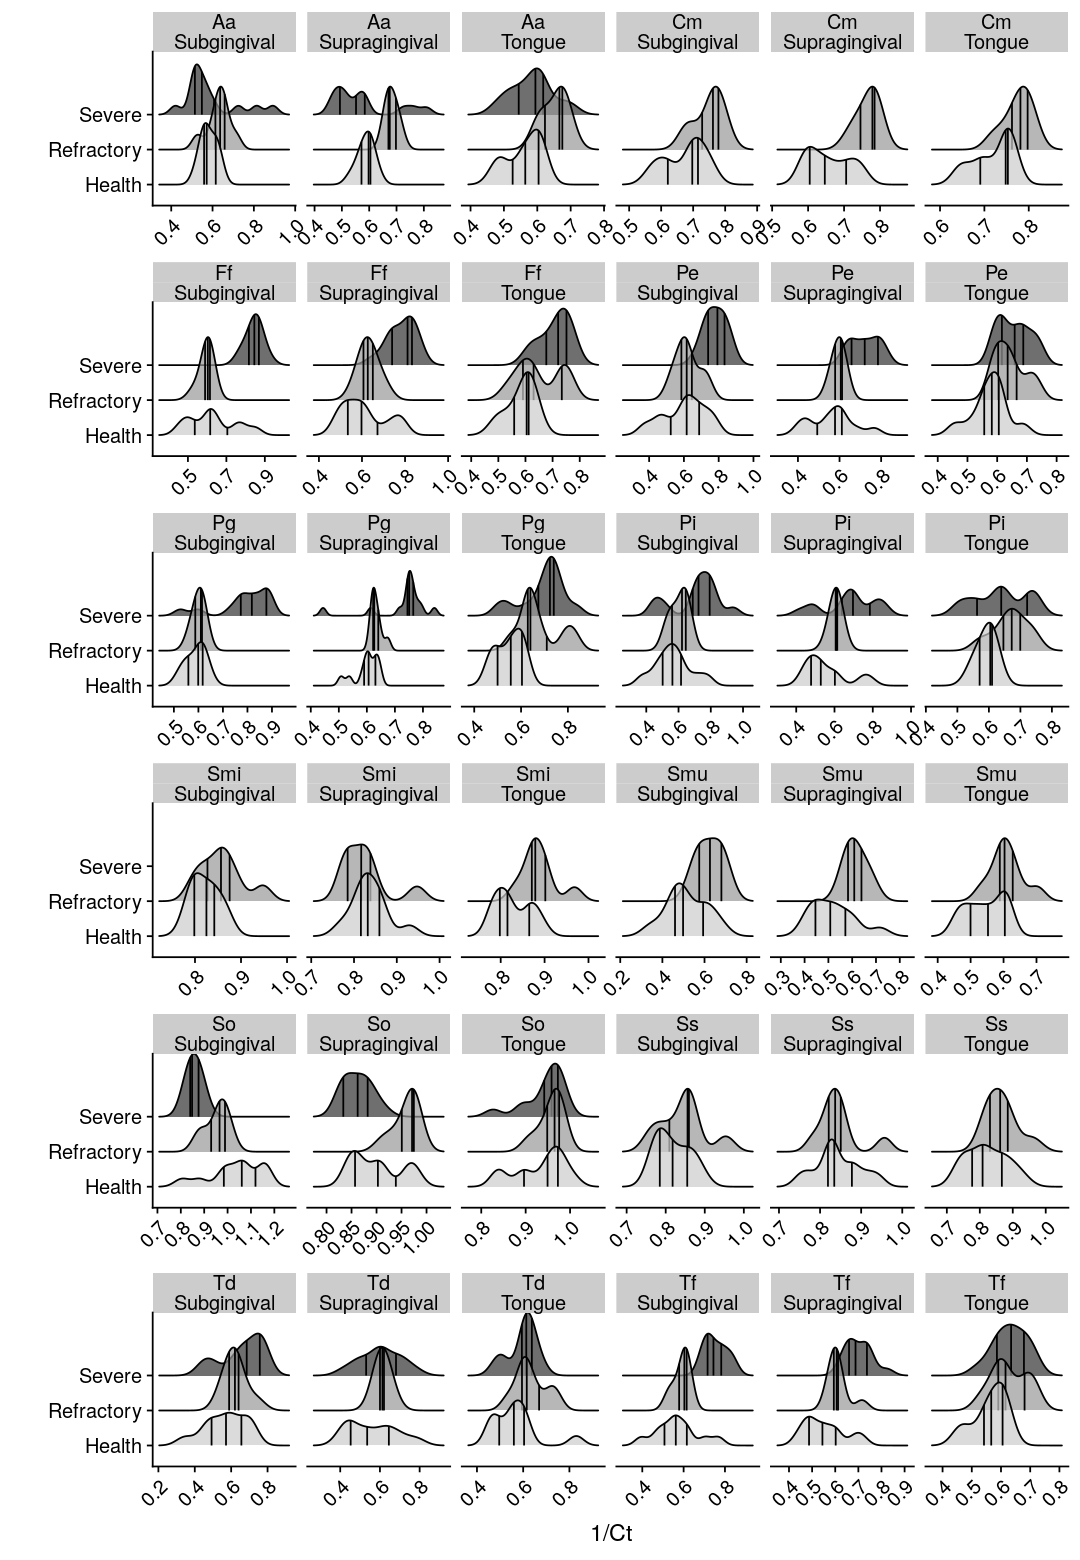

In [18]:
options(repr.plot.width=6*1.5, repr.plot.height=13)
p<-fig_qpcr
pdf("Figure4_bw.pdf", width=6*1.75, height=13)
p
dev.off()
pdf("Figure4_colour.pdf", width=6*1.75, height=13)
p+scale_fill_manual(values=c(rgb(27,158,119,maxColorValue = 255),
                         #rgb(217,95,2,maxColorValue = 255), #This is the moderate colour, but we don't have qPCR values for these samples
                         rgb(117,112,179,maxColorValue = 255),
                         rgb(231,41,138,maxColorValue = 255))) 
dev.off()
p